# I-94 Interstate Highway Traffic Analysis

This project is an analysis of traffic on the 1-94 Interstate Highway, the northernmost east-west Interstate Highway. It runs from Billings, Montana, to the Lower Peninsula of the US state of Michigan. In Michigan, it is a state trunkline highway that enters the state south of New Buffalo and runs eastward through several metropolitan areas in the southern section of the state.
 
The goal of the analysis is to determine the indicators of heavy traffic on I-94 including weather conditions, time of the day/week/year, etc. 

A station located approximately midway between Minneapolis and Saint Paul recorded the data for is westbound traffic (i.e., cars moving from east to west). This means that the results of our analysis will be about the westbound traffic in the proximity of the station. Therefore dataset is not a general representation of the entire stretch of the I-94 highway.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
i94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

print(i94.head(5))
print(i94.tail(5))
print(i94.info())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

Overall, the dataset has 48,204 rows and 9 columns with no null values. Each row represents data for a specific hour from **2012-10-02 09:00:00** to **2018-09-30 23:00:00**. The contents of each column are given below:

- **holiday** : Categorical US National holidays plus regional holiday, Minnesota State Fair
- **temp** : Numeric Average temp in kelvin
- **rain_1h** : Numeric Amount in mm of rain that occurred in the hour
- **snow_1h** :  Numeric Amount in mm of snow that occurred in the hour
- **clouds_all** : Numeric Percentage of cloud cover
- **weather_main** : Categorical Short textual description of the current weather 
- **weather_description** : Categorical Longer textual description of the current weather 
- **date_time** : DateTime Hour of the data collected in local CST time 
- **traffic_volume** : Numeric Hourly I-94 ATR 301 reported westbound traffic volume

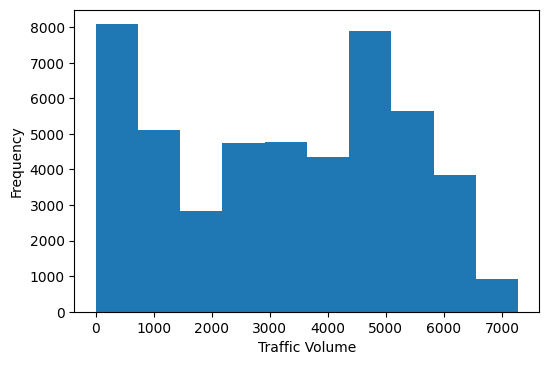

In [3]:
%matplotlib inline

i94['traffic_volume'].plot.hist()
plt.xlabel('Traffic Volume')
plt.show()

In [4]:
i94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

During the total coverage/recoding time span, the hourly traffic volume varied from 0 to 7,280 cars, with an mean of 3,260 cars per hour.

About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 75% of the time, the traffic volume was four times as much.

## Traffic Volume: Day vs Night

For this analysis daytime and nighttime are defined as follows:

- Daytime : 7 AM to 7 PM 
- Nighttime : 7 PM to 7 AM 

In [5]:
i94['date_time'] = pd.to_datetime(i94['date_time'])
times = (i94['date_time'].dt.hour.unique())

daytime = i94.copy()[(i94['date_time'].dt.hour >= 7) & (i94['date_time'].dt.hour < 19)]
print('number of day entries: ', daytime.shape[0])

nighttime = i94.copy()[(i94['date_time'].dt.hour >= 19) | (i94['date_time'].dt.hour < 7)]
print('number of night entries: ',nighttime.shape[0])


number of day entries:  23877
number of night entries:  24327


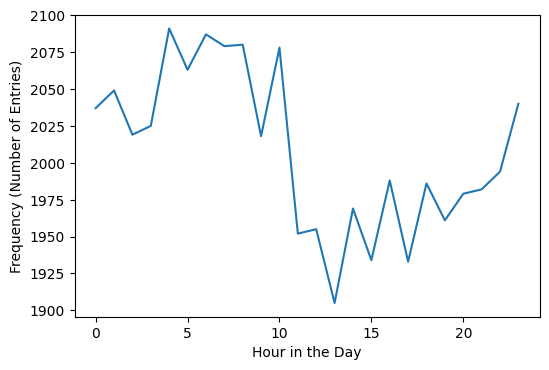

In [6]:
%matplotlib inline

hour_series = i94['date_time'].dt.hour

# hour_series.value_counts().sort_index(ascending=True).plot(kind = 'bar')
hour_series.value_counts().sort_index(ascending=True).plot.line()
plt.xlabel('Hour in the Day')
plt.ylabel('Frequency (Number of Entries)')
plt.show()

This significant in the number of entries during day and night can be attributed to missing data. As seen in the bar plot above, the hours between 10 and 17 seem to have somewat fewer entries than the other hours. 

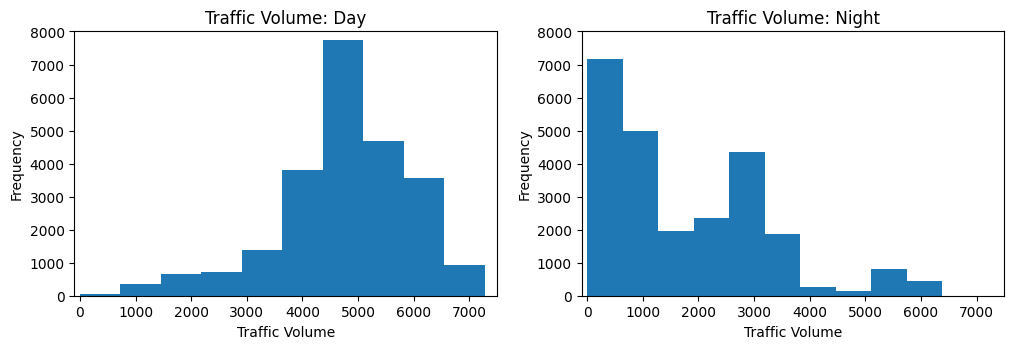

In [7]:
plt.figure(figsize=(12,3.5))

plt.subplot(1, 2, 1)
plt.hist(daytime['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(nighttime['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [8]:
print('Daytime info:')
print(daytime['traffic_volume'].describe())
print('\n')

print('Nighttime info:')
print(nighttime['traffic_volume'].describe())

Daytime info:
count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64


Nighttime info:
count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


The daytime distribution is narrowly similar to a normal distribution but more closely similar to a left skewed distribution. \
This means that most of the traffic volume values are high and this is also observed with the quartile values. Only 25% of values are less than 4,252. There are 4,252 or more cars passing the station each hour 75% of the time.

The nighttime distribution is right-skewed, implying that most of the traffic volume entered at night are low. 75% of the time, the number of cars that passed the station each hour was less than 2,819.

The maximum traffic volume registered at night is almost 6400 however, the general trend depicts significantly less traffic than that recorded during the day hours. To find indicators for **heavy traffic**, the analysis will continue with only the daytime data.

## Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of day.

Next, line plots showing how the traffic volume changes according to the following parameters are generated and analysed:

- Month
- Day of the week
- Time of day

### Month of the Year vs. Traffic Volumes

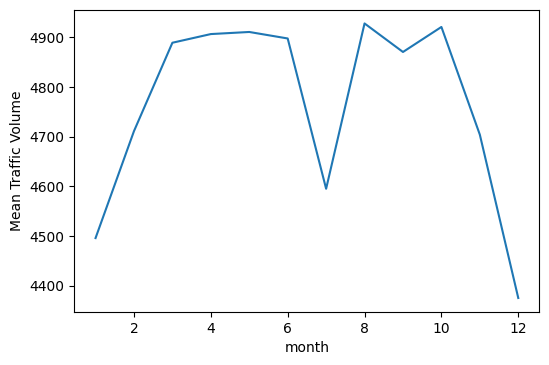

In [9]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()

by_month['traffic_volume'].plot.line()
plt.ylabel('Mean Traffic Volume')
plt.show()

**January, July, November** and **December** have noticably lower mean traffic volumes. **January, November and December** are winter months and this could be the reason for this disparity. The low value for July, however, is unclear and this should be investigated further.

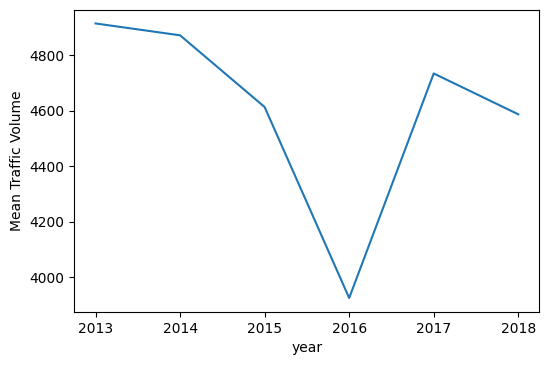

In [10]:
daytime['year'] = daytime['date_time'].dt.year
by_year = daytime.groupby('year')

month_july = daytime[daytime['month'] == 7]
month_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.ylabel('Mean Traffic Volume')
plt.show()

It is observed that the mean traffic value for is July similar to other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction — [this article](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) from 2016 supports this hypothesis.

Since the drop in July is determined to be as an unusual non-time dependent anomaly, a tentative conclusion is made here to assert that warmer months generally show heavier traffic compared to winter months months.

### Day of the Week vs. Traffic Volumes

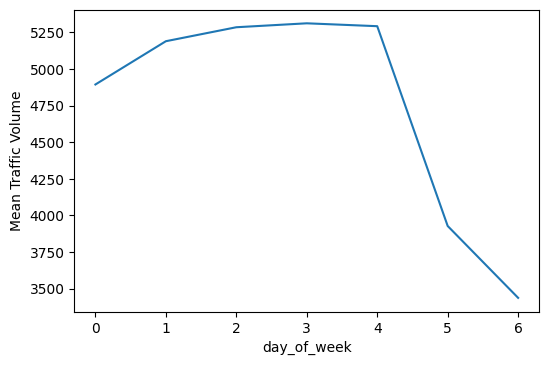

day_of_week
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64


In [11]:
daytime['day_of_week'] = daytime['date_time'].dt.dayofweek
by_week_day = daytime.groupby('day_of_week').mean()

by_week_day['traffic_volume'].plot.line()
plt.ylabel('Mean Traffic Volume')
plt.show()

print(by_week_day['traffic_volume'])

The mean traffic volume is steadily around 5200 during Tuesday to Friday with slightly lower average of ~4900 for Monday. There is a significant drop however during the weekend (Saturday and Sunday) to averages less than 4000.

Another tentative conclusion is that there is less traffic (mean volumes lower than ~4500) volumes on i-94 during the weekend. This is likely due to reduced travel for work at the weekends. 

### Time of the Day vs. Traffic Volumes

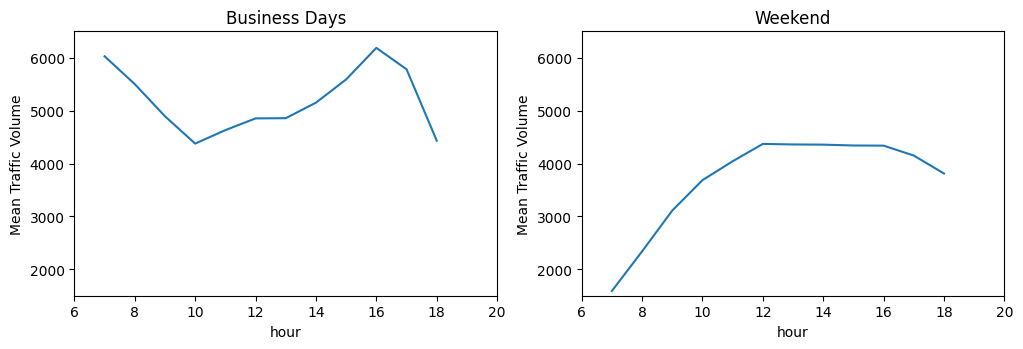

In [14]:
daytime['hour'] = daytime['date_time'].dt.hour

business_days = daytime.copy()[daytime['day_of_week']<=4]
weekend = daytime.copy()[daytime['day_of_week']>4]

by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

plt.figure(figsize=(12,3.5))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Business Days')
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.ylabel('Mean Traffic Volume')

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Weekend')
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.ylabel('Mean Traffic Volume')
plt.show()

The trend for business days are high peaks with mean values higher than 6000 early in the morning  at 7am and at 16 and 17 pm. This corresponds to the main hours within which people travel to and from work.

Alternatively, higher volumes are noticed in the mid afternoon  between 12-16 hours compared to other hours during the weekend.  This suggests that during the weekends more people travel during the mid-day, possible because these are social events or errands with little time constraints.

### Time Indicators for Heavy Traffic - Summary

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

## Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

First, the numeric correlation is computed for the columns with numercal data.

In [17]:
daytime.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
day_of_week      -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

The numeric weather column with the strongest correlation with traffic_volume is the temperature (temp) column.

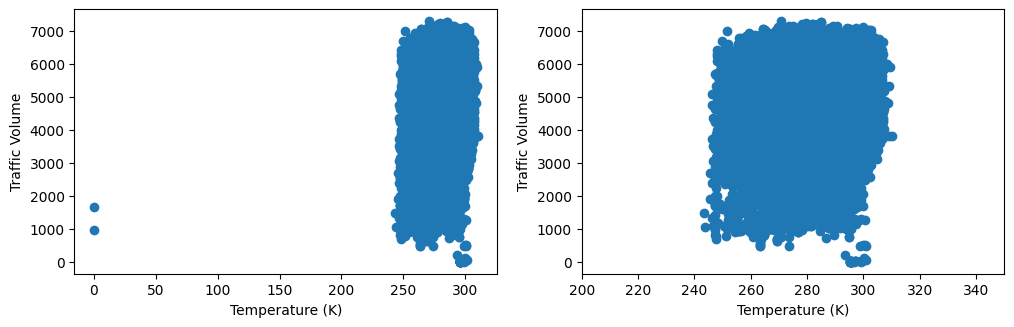

In [25]:
plt.figure(figsize=(12,3.5))

plt.subplot(1,2,1)
plt.scatter(daytime['temp'], daytime[['traffic_volume']])
plt.xlabel('Temperature (K)')
plt.ylabel('Traffic Volume')

plt.subplot(1,2,2)
plt.scatter(daytime['temp'], daytime[['traffic_volume']])
plt.xlabel('Temperature (K)')
plt.xlim(200,350)
plt.ylabel('Traffic Volume')

plt.show()

The strongest correlation is numercally determined to be with temperature however it is graphically observed to be a very poor indicator as most of the data was taken for temperatures between 250 and 300K and is evenly distributed across this temp.

2 data points were recorded at 0K however this is most likely a data error as this is too low a temoerature for the area.

The weather colums are unreliable heavy traffic indicators, probably because the time columns showed that traffic was heavier when people were travelling to and from work; these conditions remain constant despite the temperature or weather.

Next we assess the categorical weather-related columns: weather_main and weather_description.



In [27]:
daytime['weather_main'].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Smoke', 'Squall'], dtype=object)

The classification is somewhat vague but a bar plot might show if any of these are associated with heavy traffic.

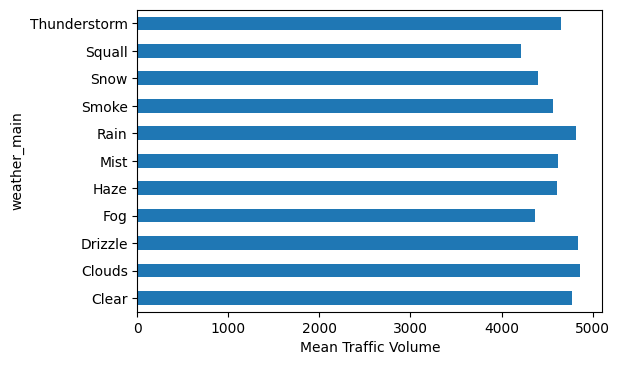

In [30]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.xlabel('Mean Traffic Volume')
plt.show()

All values are below 5000. The averages for foggy and squally days are lover than the rest, however the difference is not significant enough to make a concrete conclusion.


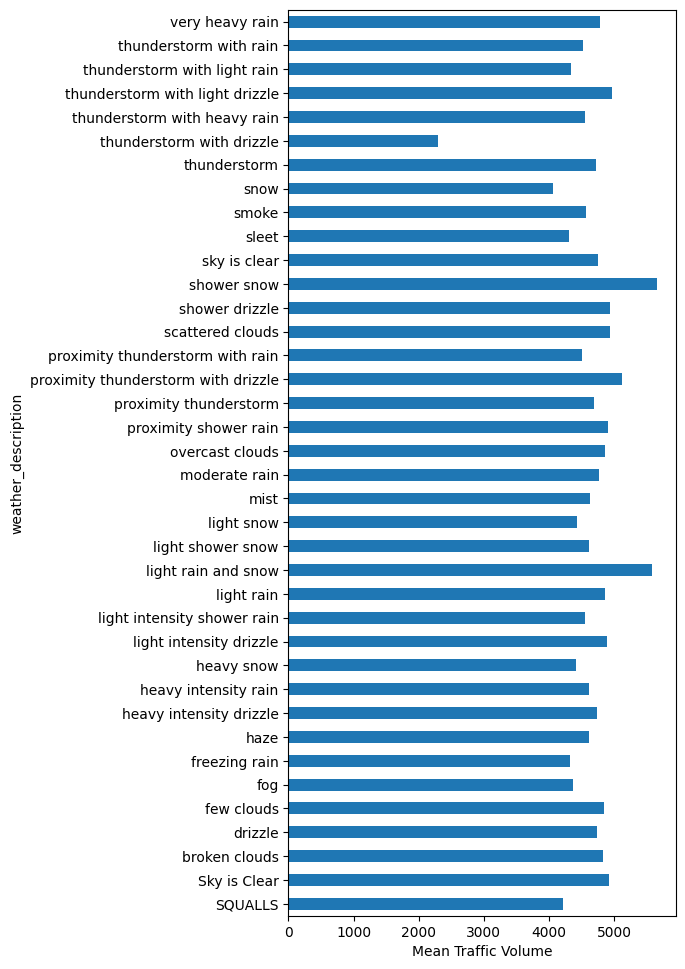

In [33]:
by_weather_desc = daytime.groupby('weather_description').mean()
by_weather_desc['traffic_volume'].plot.barh(figsize=(5,12))
plt.xlabel('Mean Traffic Volume')
plt.show()

This column has more detailed columns however, **Shower snow**, **Light rain and snow** and **Proximity thunderstorm with drizzle** are the only weather conditions with mean traffic volume excehigher than 5,000.

It is weird that these weather types have the highest mean traffic values because there are worse conditions (especially for driving) such as thunderstorm with heavy rain.

# Conclusion

For this project, the goal was to identify the indicators of heavy traffic on the I-94 Interstate highway. 

### Time indicators
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to the weekends.
- On business days, the rush hours are around 7 and 16.

### Weather indicators
- When the weather conditions are classified/described as **Shower snow, Light rain and snow** or **Proximity thunderstorm with drizzle**, the traffic volumes were high.

#### Further analysis:
- Use the nighttime data to look for heavy traffic indicators.
